In [15]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import risk1 as r

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Deviation From Normality

In [10]:
hfi = r.get_hfi_returns()
hfi.head()

c:\Users\Sumeet Maheshwari\Desktop\end to end project\Portfolio_Construction_python\risk1.py:36: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\data dump\VweKqLJfEemJ1w4LYV5qDg_2c089d97f24e49daa70b757b8337a76f_data (1)\edhec-hedgefundindices.csv",


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [11]:
pd.concat([hfi.mean(),hfi.median(),hfi.mean()> hfi.median()], axis= 1)


,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


# Skewness function
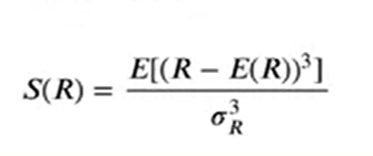

In [25]:
data = r.skewness(hfi).sort_values()
data

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

# Ploting Skewness 

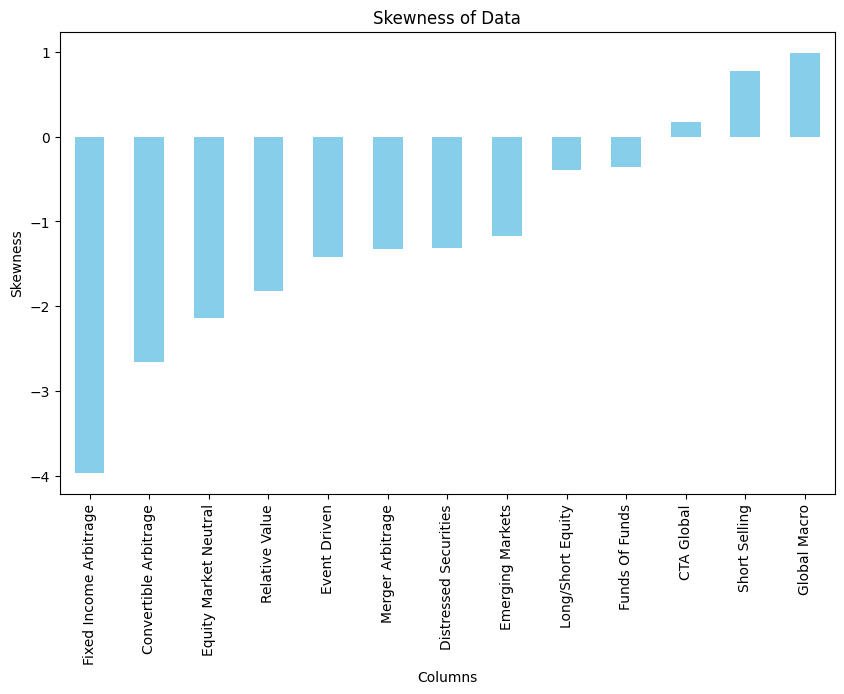

In [26]:
r.plot_skewness(hfi)

In [14]:
# using python library
import scipy.stats as sts
sts.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

# Kurtosis
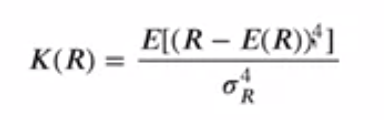

In [27]:
r.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

# Checking Normality of Data Using Hypothesis
Applies the jarque Bera test to determine if serires is normal or not 

test is applied at the 1% level by default

returns True if the hypothesis of normal is accepted, fales ortherwise

In [28]:
r.is_normal(hfi)

False

In [29]:
hfi.aggregate(r.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [33]:
ffme = r.get_ffme_return()
r.skewness(ffme)

small_cap    4.410739
large_cap    0.233445
dtype: float64

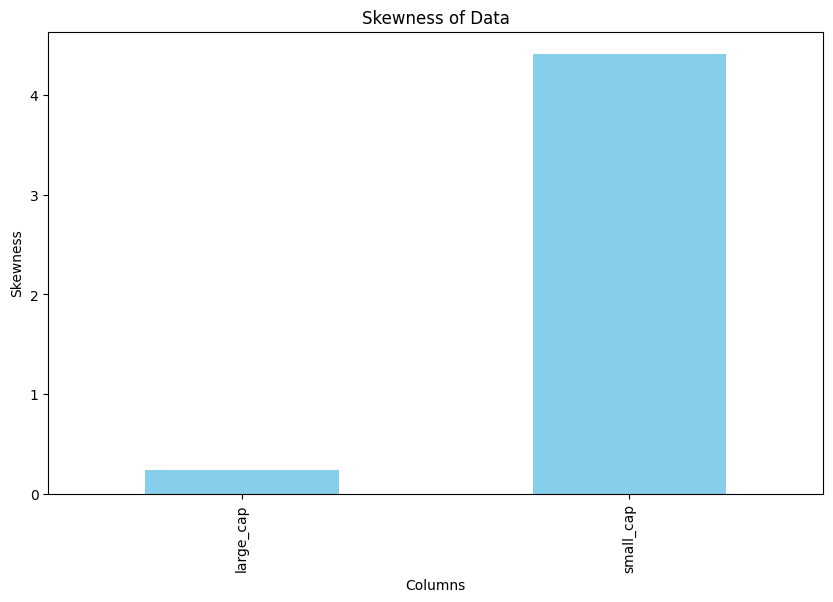

In [35]:
# ploting skewness
r.plot_skewness(ffme)

In [34]:
r.kurtosis(ffme)

small_cap    46.845008
large_cap    10.694654
dtype: float64

In [36]:
r.is_normal(ffme)

False

In [37]:
ffme.aggregate(r.is_normal)

small_cap    False
large_cap    False
dtype: bool